<a href="https://colab.research.google.com/github/TreeBranchWL/TreeBranch-project/blob/main/TREEBRANCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                "hours-per-week", "native-country", "income"]

data = pd.read_csv('adult.data', names=column_names, sep='\s*,\s*')



<ipython-input-3-ccff3312115d>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('adult.data', names=column_names, sep='\s*,\s*')


In [ ]:
#Histograms for Numerical Features
import matplotlib.pyplot as plt

num_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
data[num_features].hist(figsize=(15,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [ ]:
#Bar Plots for Categorical Features
###We may not use this
import seaborn as sns

cat_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
for feature in cat_features:
    plt.figure(figsize=(15,6))
    sns.countplot(y=feature, data=data, order = data[feature].value_counts().index)
    plt.title(f"Distribution of {feature}")
    plt.show()


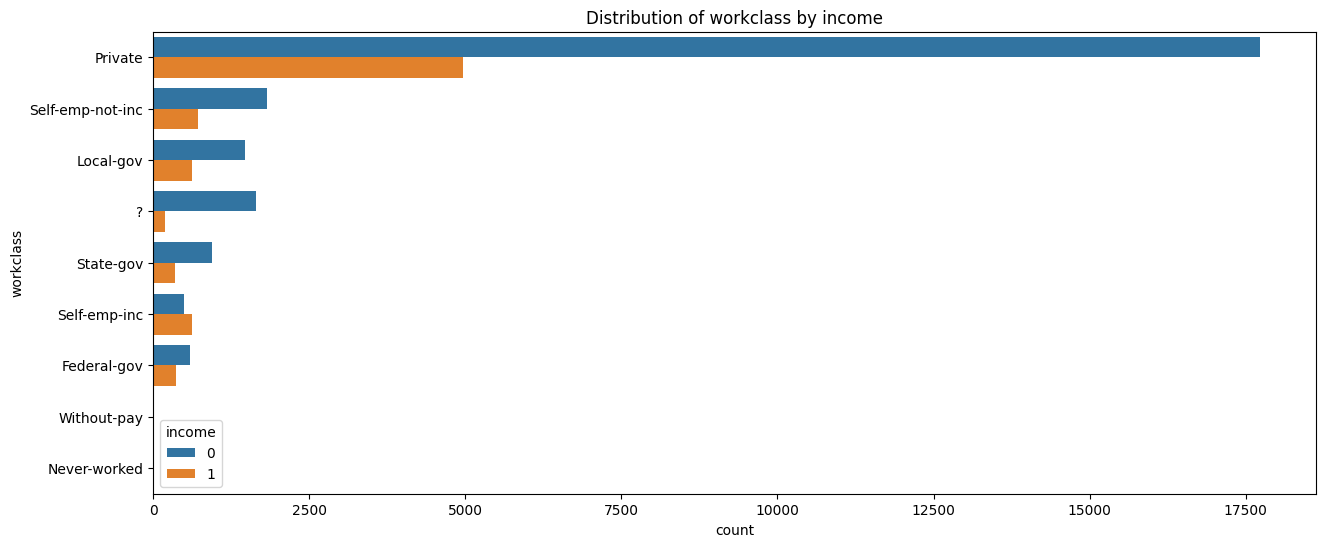

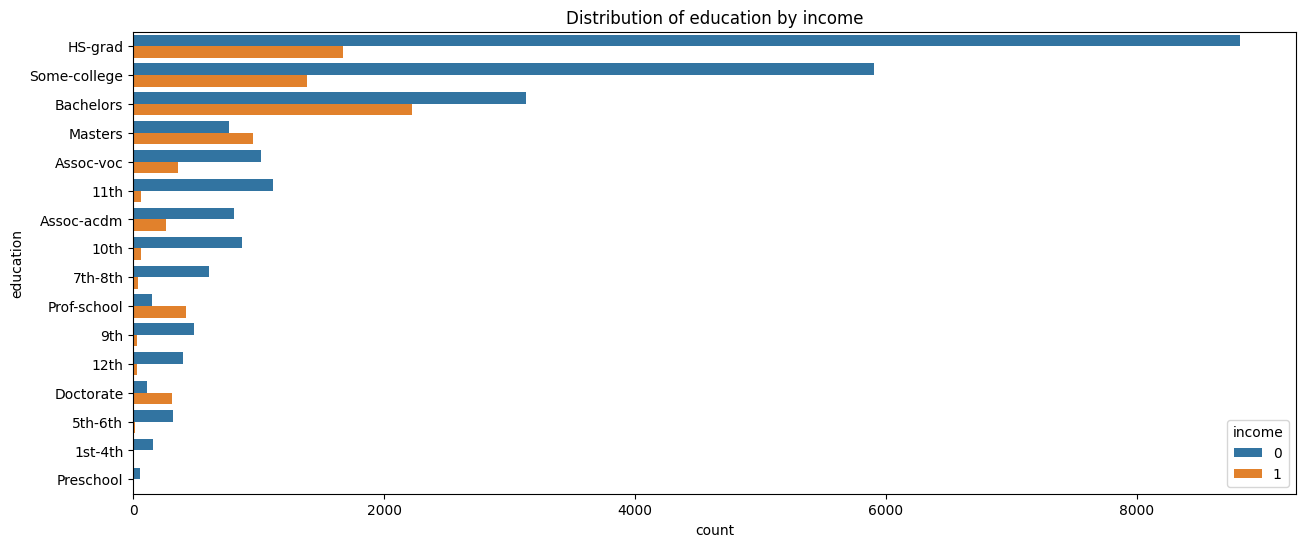

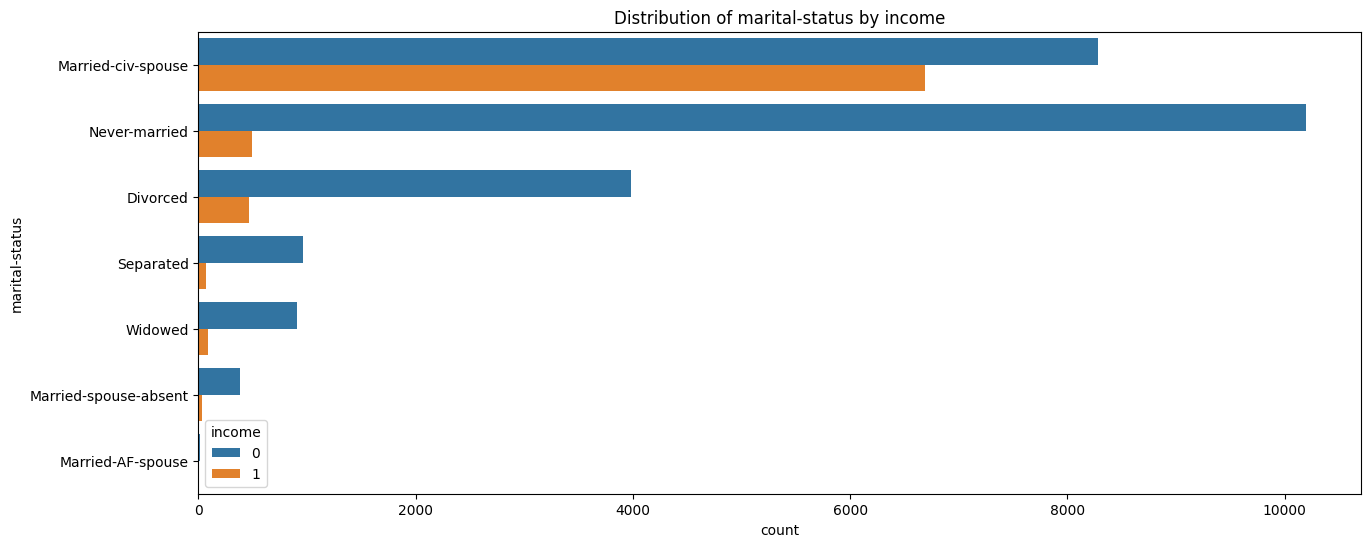

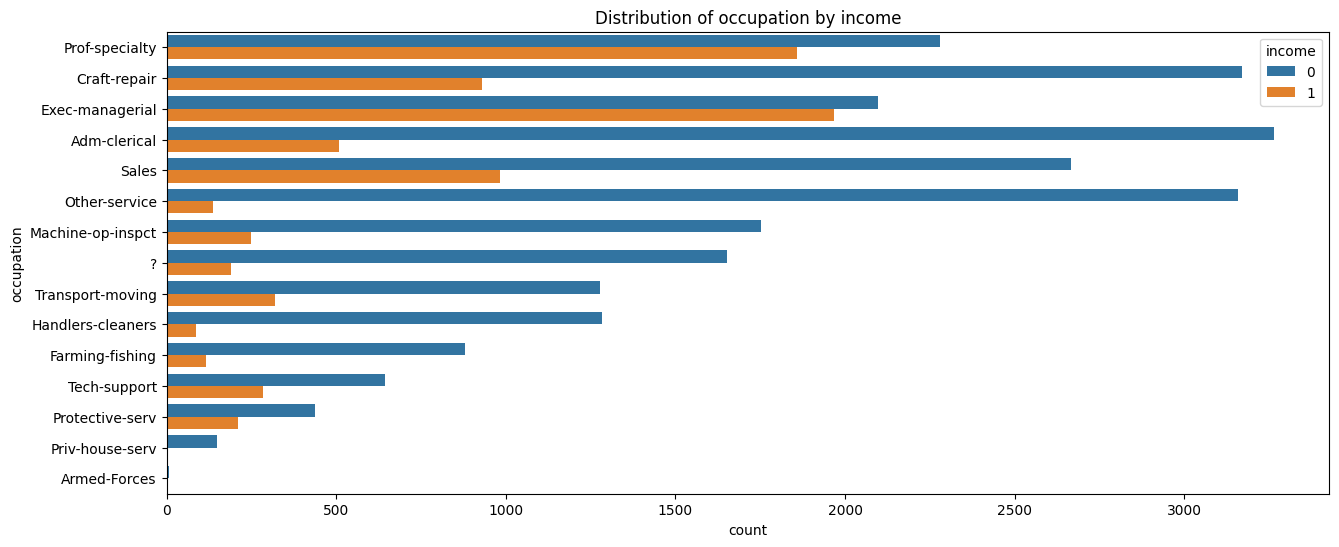

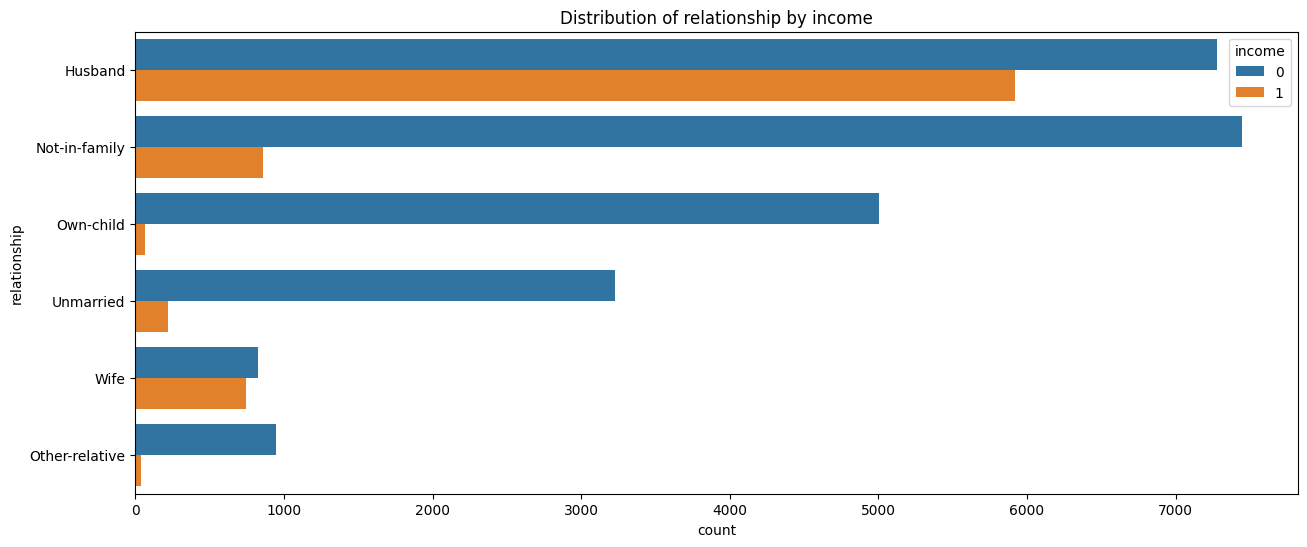

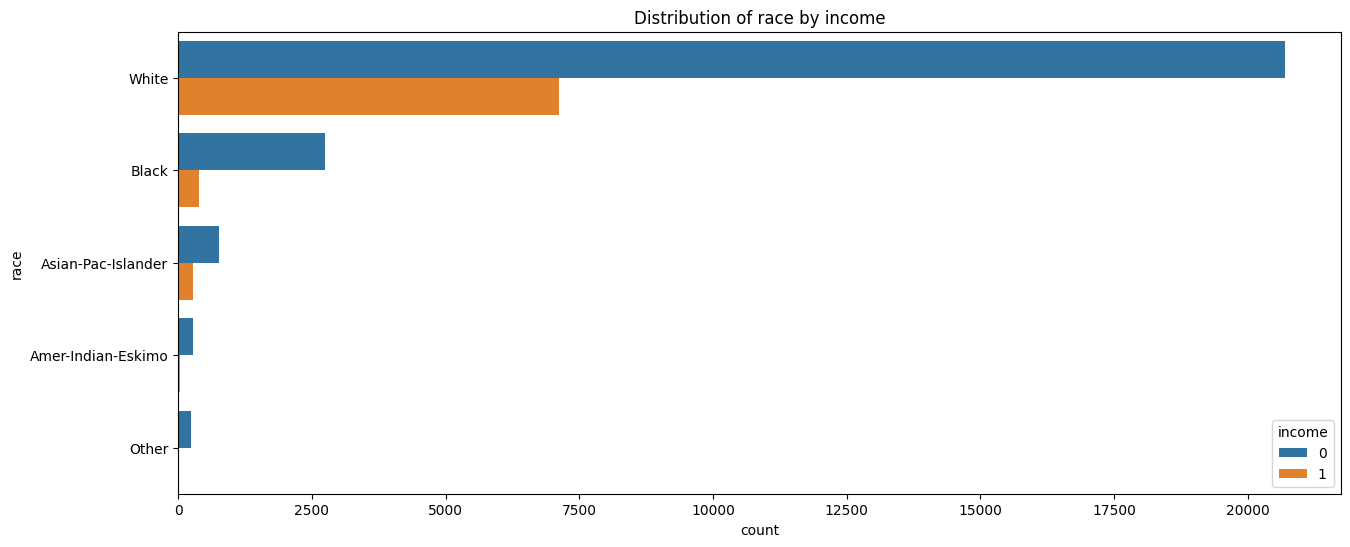

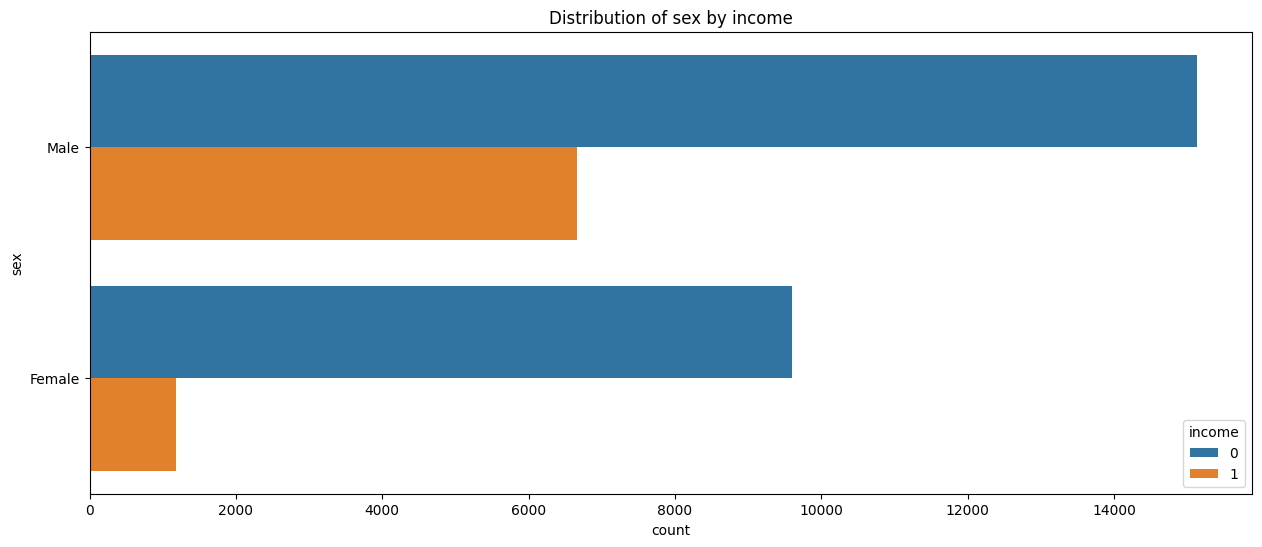

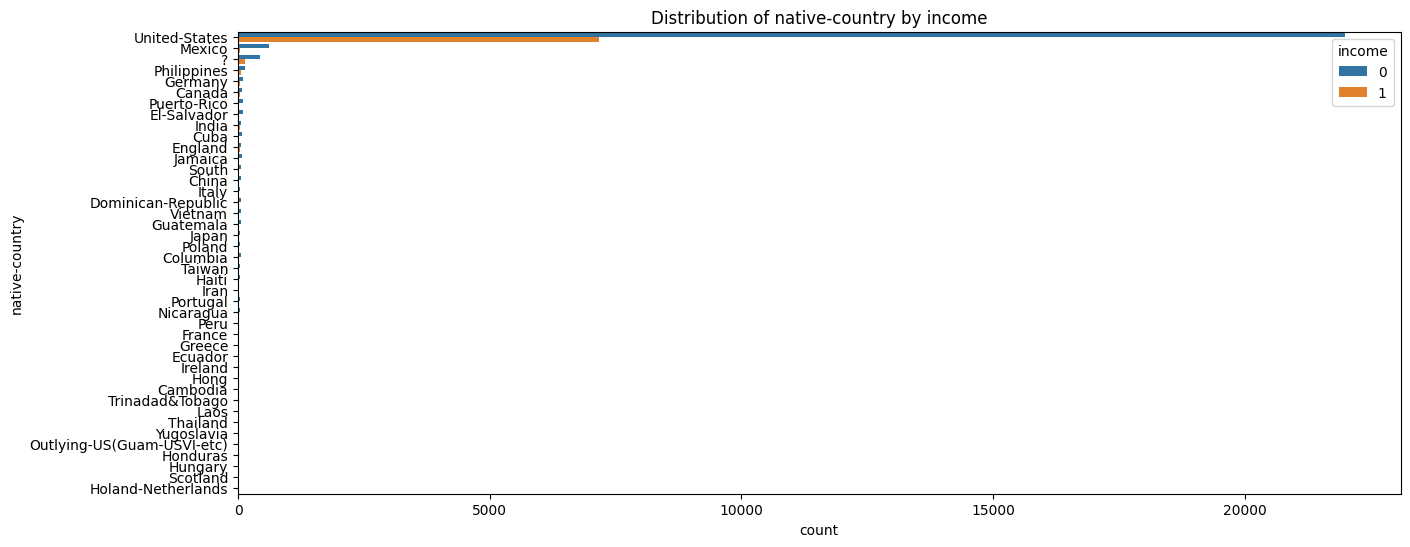

In [11]:
#Bar Plots for Categorical Features with income
import seaborn as sns
import matplotlib.pyplot as plt

cat_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
for feature in cat_features:
    plt.figure(figsize=(15,6))
    sns.countplot(y=feature, hue="income", data=data, order = data[feature].value_counts().index)
    plt.title(f"Distribution of {feature} by income")
    plt.show()


In [ ]:
####heatmap before clean
data['income'] = data['income'].map({'>50K': 1, '<=50K': 0})

# 从数据集中筛选出数值型列
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# 计算数值型列的相关性矩阵
corr = numeric_data.corr()

# 创建一个heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Convert categorical columns to dummy variables (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['workclass', 'relationship', 'race', 'sex'])

# Select relevant columns and compute the correlation matrix
columns_to_consider = ['education-num', 'age', 'hours-per-week'] + [col for col in data_encoded if col.startswith(('workclass', 'relationship', 'race', 'sex'))]
corr = data_encoded[columns_to_consider].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw heatmap
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()





In [8]:
######在洗一遍
import pandas as pd

# 读取数据
db_adult = pd.read_csv("adult.data", sep=",", header=None)

# 设置列名
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
                "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
                "hours_per_week", "native_country", "income"]
db_adult.columns = column_names

##drop education and fnlwgt( unnecessary data)

db_adult.drop(columns=["education", "fnlwgt"], inplace=True)

# 复制原始数据以供后续查看
db_adult_original = db_adult.copy()

# 输出替换前的数据统计信息
print("Before replacement:")
for column in db_adult_original.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(db_adult_original[column].value_counts())
    print("-------------\n")

# 替换分类特征中的缺失值为'unknown'
categorical_columns = db_adult.select_dtypes(include=['object']).columns
for column in categorical_columns:
    db_adult[column] = db_adult[column].astype(str).replace(" ?", "unknown")

# 替换数值特征中的缺失值为0
numerical_columns = db_adult.select_dtypes(exclude=['object']).columns
for column in numerical_columns:
    db_adult[column].fillna(0, inplace=True)

# 重新编号数据框的行
db_adult.index = range(1, len(db_adult) + 1)

# 查看替换后的数据
print("After replacement:")
for column in db_adult.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(db_adult[column].value_counts())
    print("-------------\n")



Before replacement:
Column: workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
-------------

Column: marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
-------------

Column: occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-h

            age  education-num  capital-gain  capital-loss  hours-per-week
0      0.030671       1.134739      0.148453      -0.21666       -0.035429
1      0.837109       1.134739     -0.145920      -0.21666       -2.222153
2     -0.042642      -0.420060     -0.145920      -0.21666       -0.035429
3      1.057047      -1.197459     -0.145920      -0.21666       -0.035429
4     -0.775768       1.134739     -0.145920      -0.21666       -0.035429
...         ...            ...           ...           ...             ...
32556 -0.849080       0.746039     -0.145920      -0.21666       -0.197409
32557  0.103983      -0.420060     -0.145920      -0.21666       -0.035429
32558  1.423610      -0.420060     -0.145920      -0.21666       -0.035429
32559 -1.215643      -0.420060     -0.145920      -0.21666       -1.655225
32560  0.983734      -0.420060      1.888424      -0.21666       -0.035429

[32561 rows x 5 columns]
Number of outliers detected by z-score: 2410


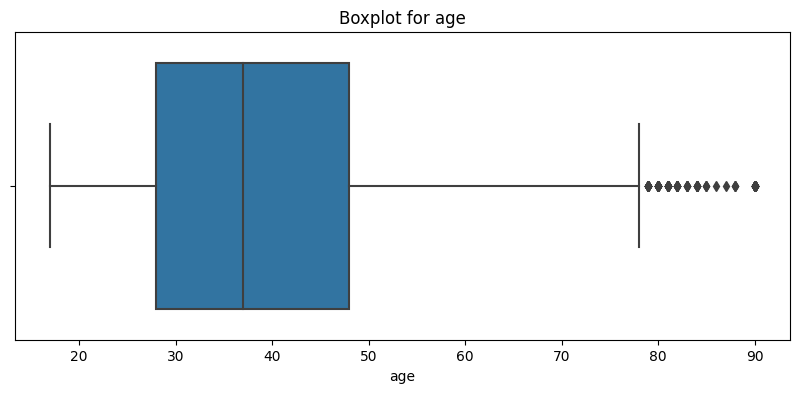

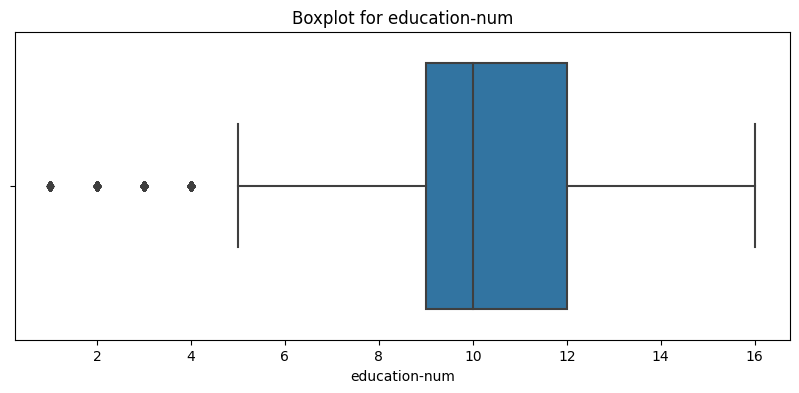

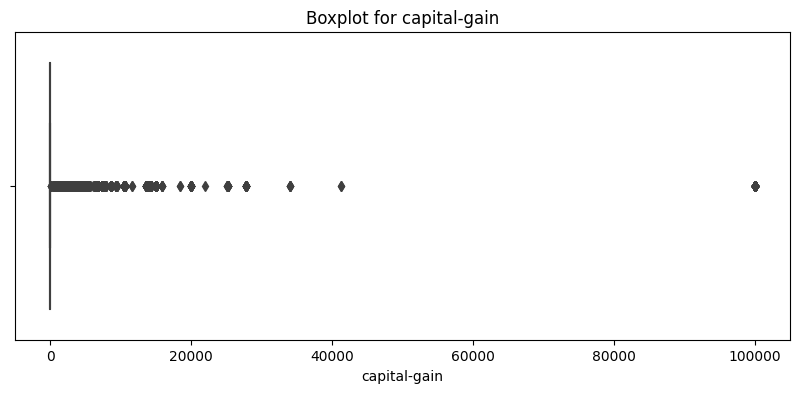

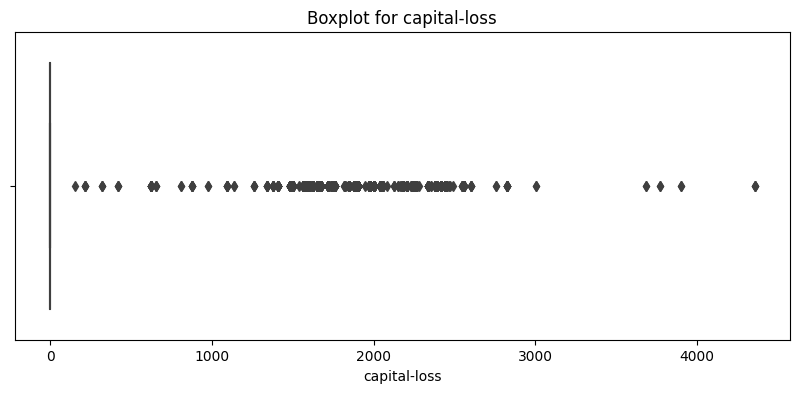

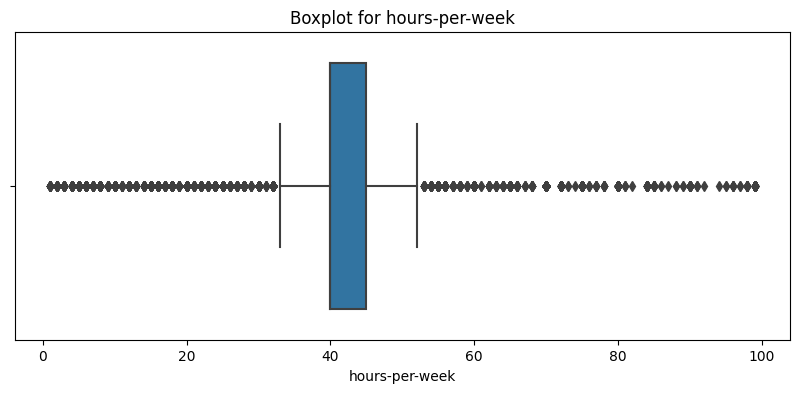

In [12]:
########


import numpy as np
from scipy.stats import zscore

# import data and check z score
numeric_cols = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
z_scores = zscore(data[numeric_cols])
print(z_scores)
abs_z_scores = np.abs(z_scores)

# Find rows where any column has an absolute z-score > 3
outliers_zscore = (abs_z_scores > 3).any(axis=1)

# Count the number of outliers
num_outliers = outliers_zscore.sum()

print(f"Number of outliers detected by z-score: {num_outliers}")

##box plot
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()




            age  education-num  capital-gain  capital-loss  hours-per-week
0      0.030671       1.134739      0.148453      -0.21666       -0.035429
1      0.837109       1.134739     -0.145920      -0.21666       -2.222153
2     -0.042642      -0.420060     -0.145920      -0.21666       -0.035429
3      1.057047      -1.197459     -0.145920      -0.21666       -0.035429
4     -0.775768       1.134739     -0.145920      -0.21666       -0.035429
...         ...            ...           ...           ...             ...
32556 -0.849080       0.746039     -0.145920      -0.21666       -0.197409
32557  0.103983      -0.420060     -0.145920      -0.21666       -0.035429
32558  1.423610      -0.420060     -0.145920      -0.21666       -0.035429
32559 -1.215643      -0.420060     -0.145920      -0.21666       -1.655225
32560  0.983734      -0.420060      1.888424      -0.21666       -0.035429

[32561 rows x 5 columns]
The percentage of people working 90-100 hours per week is: 0.43%
Number of

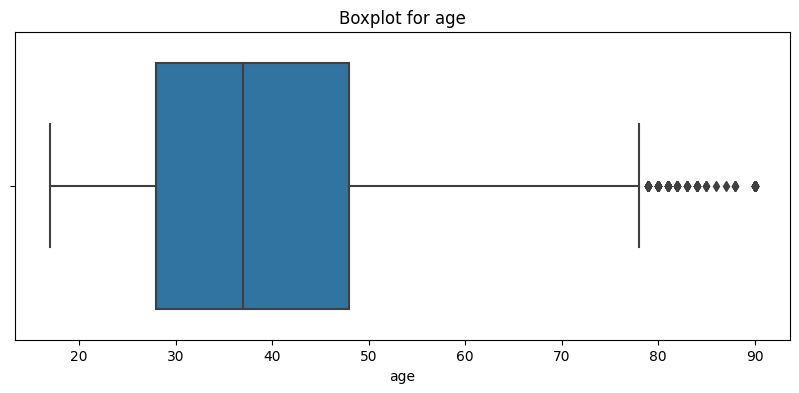

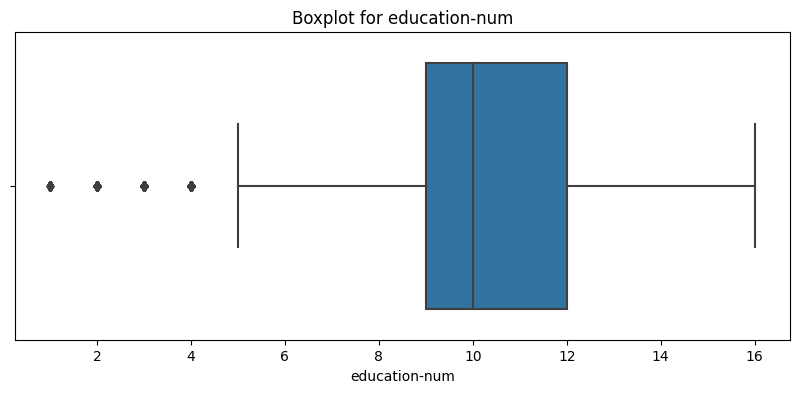

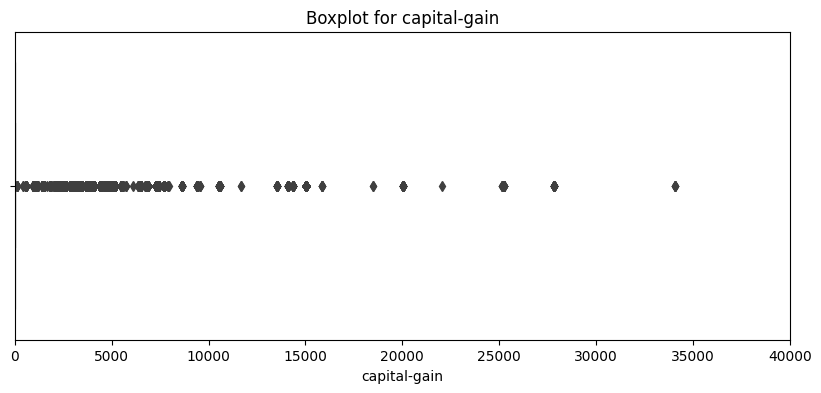

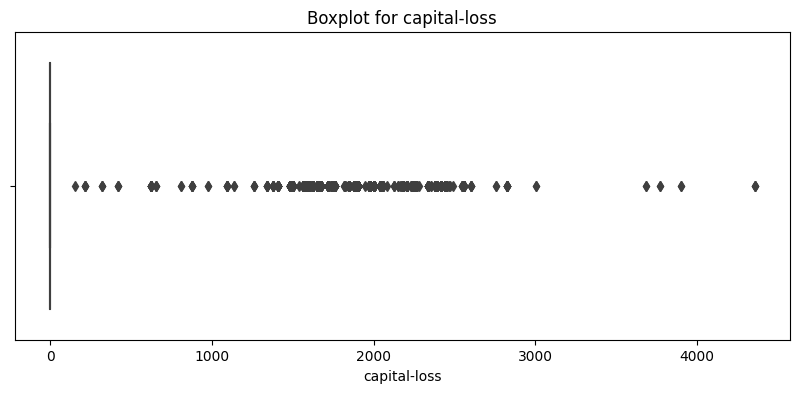

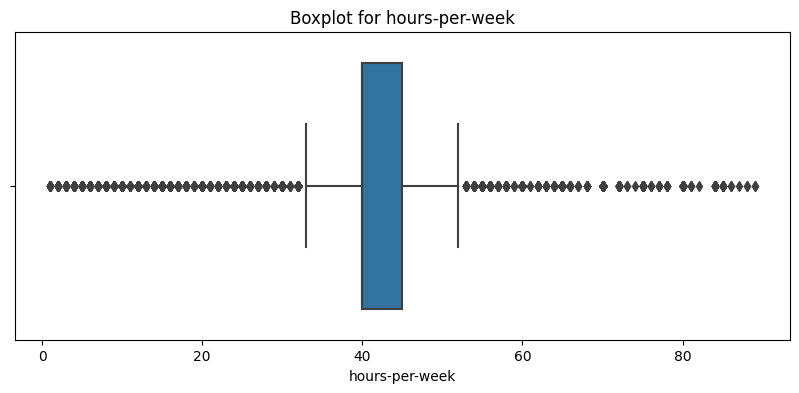

In [15]:
####最新的outlier detection
import numpy as np
from scipy.stats import zscore
import pandas as pd

# import data and check z scores.
numeric_cols = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
z_scores = zscore(data[numeric_cols])
print(z_scores)
abs_z_scores = np.abs(z_scores)

# checking work hours per week
filtered_data = data[(data["hours-per-week"] >= 90) & (data["hours-per-week"] <= 100)]

percentage = (len(filtered_data) / len(data)) * 100

print(f"The percentage of people working 90-100 hours per week is: {percentage:.2f}%")

## delete 90-100 hours/per week

data = data[(data["hours-per-week"] < 90) | (data["hours-per-week"] > 100)]

# Find rows where any column has an absolute z-score > 3
outliers_zscore = (abs_z_scores > 3).any(axis=1)

# Count the number of outliers
num_outliers = outliers_zscore.sum()

print(f"Number of outliers detected by z-score: {num_outliers}")

##box plot
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    if col == "capital-gain":
        plt.xlim(0, 40000)  # Setting the x-axis limit to 40000 only for "capital-gain"
    plt.show()



In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in ['occupation', 'workclass', 'relationship']:
    le = LabelEncoder()
    data[column + '_encoded'] = le.fit_transform(data[column])
    label_encoders[column] = le


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 选择标签编码的特征进行训练
X = data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'occupation_encoded', 'workclass_encoded', 'relationship_encoded']]
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林模型实例
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 预测
y_pred = rf.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 86.07%
